In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('carprices.csv')

In [3]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [4]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


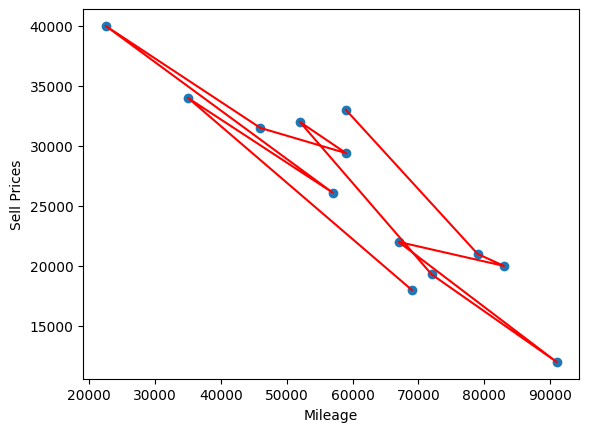

In [10]:
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.xlabel('Mileage')
plt.ylabel('Sell Prices')
plt.plot(df['Mileage'],df['Sell Price($)'], color='red')


In [12]:
dummy = pd.get_dummies(df['Car Model'])

In [15]:
new_df = pd.concat([df,dummy], axis='columns')

In [16]:
new_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [19]:
final_df =new_df.drop(['Car Model','Mercedez Benz C class'], axis='columns')

In [21]:
X = final_df.drop(['Sell Price($)'], axis='columns')

In [22]:
y = final_df['Sell Price($)']

In [23]:
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [25]:
from sklearn import linear_model

In [26]:
reg = linear_model.LinearRegression()

In [28]:
reg.fit(X,y)

LinearRegression()

In [29]:
reg.predict([[45000,4,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [30]:
reg.predict([[86000,7,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [32]:
reg.score(X,y)

0.9417050937281082

In [34]:
# to save the file
# import pickle
# with open('save_model','wb') as f:
#   pickle.dump('save_model',f)